## Distribution of Returns

#### Main Problems
**Facts**
> In December 12, 2019, Robinhood introduced fractional share trading on its platform
- I don't know how many stocks each position holds, BUT i know that fractional investments are possible.
    - I can assume that the amount of money invested in each stock is normally distributed and i.i.d. for each stock
    - However, I will never know if someone has sold 99.9% of their position in a certain stock 
- The number of total active users incresed significantly after the early-2020 covid crash

In [2]:
%load_ext autoreload
%autoreload 2

2025-04-07 18:27:47,417 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh.parquet (data_loader.py:53)
2025-04-07 18:27:47,417 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_new.parquet (data_loader.py:54)
2025-04-07 18:27:47,418 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:55)


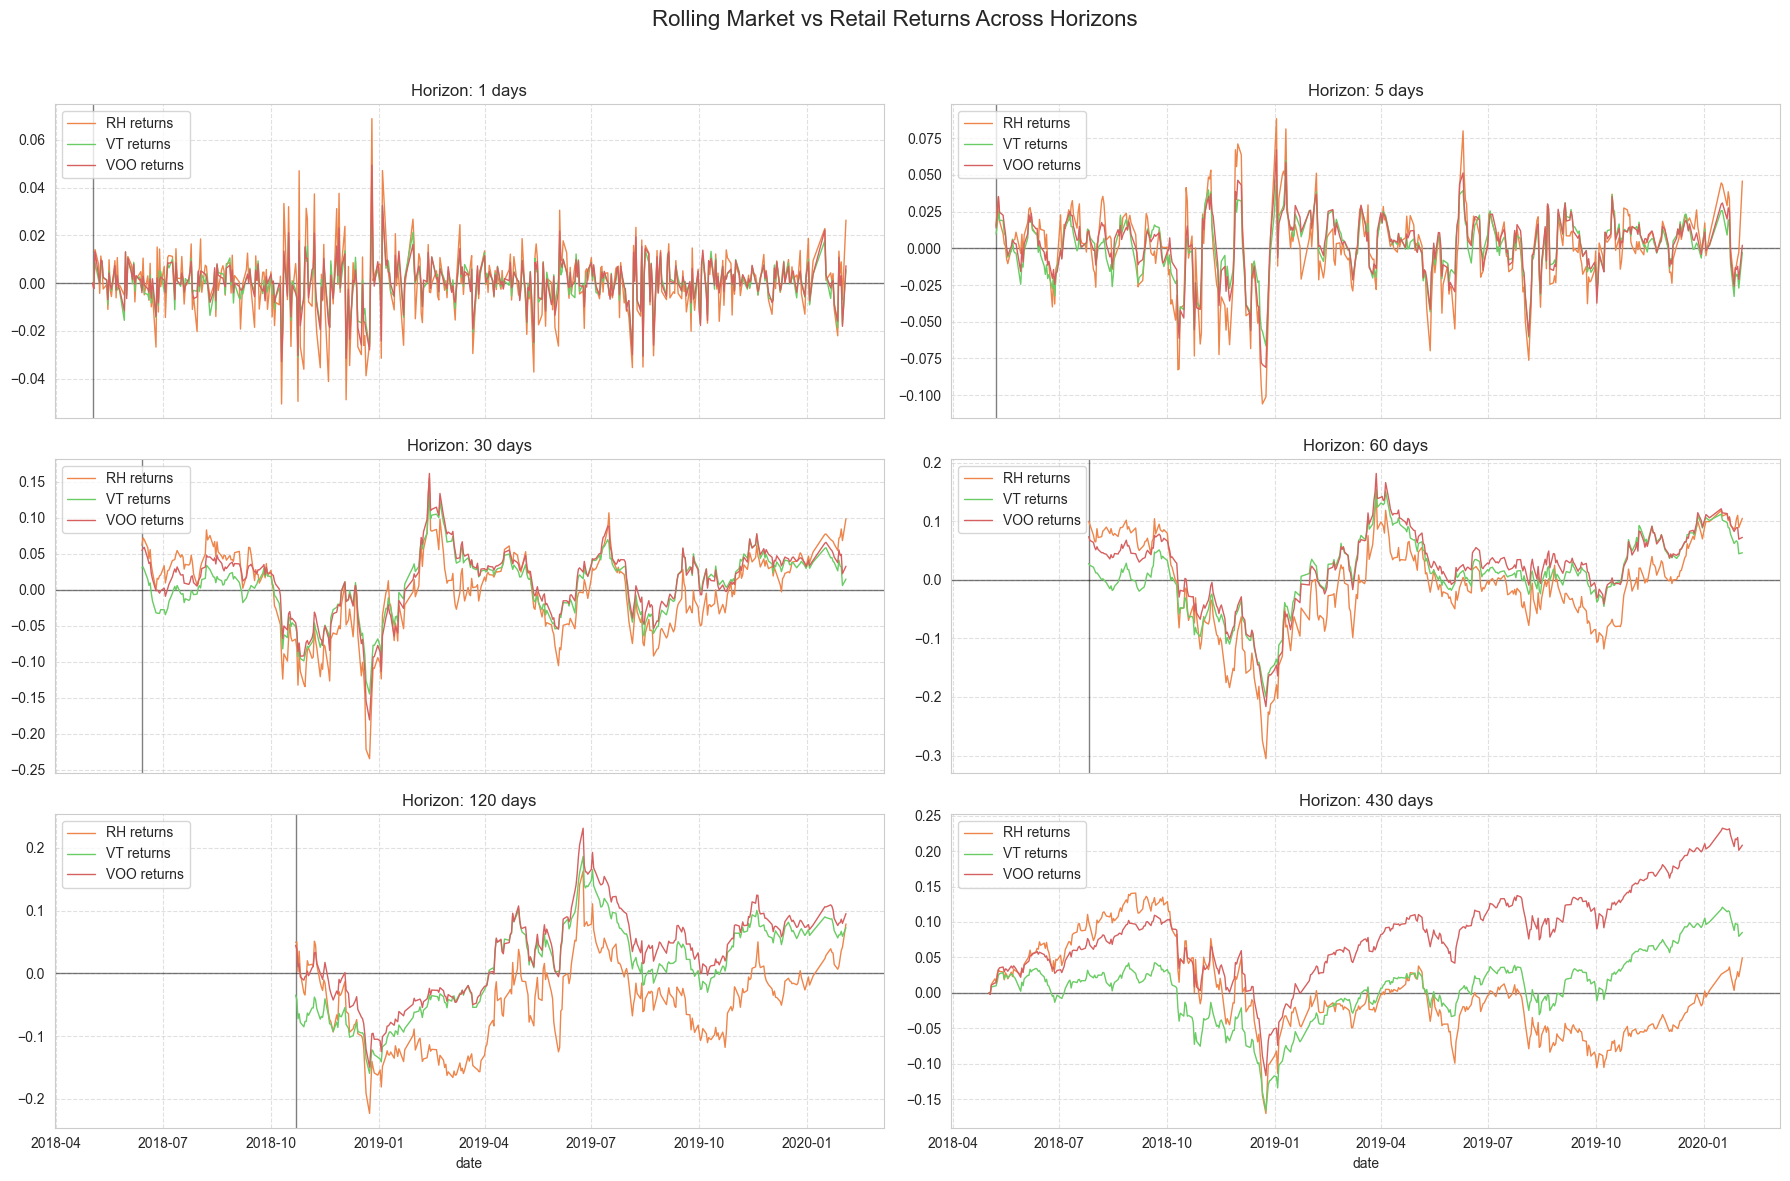

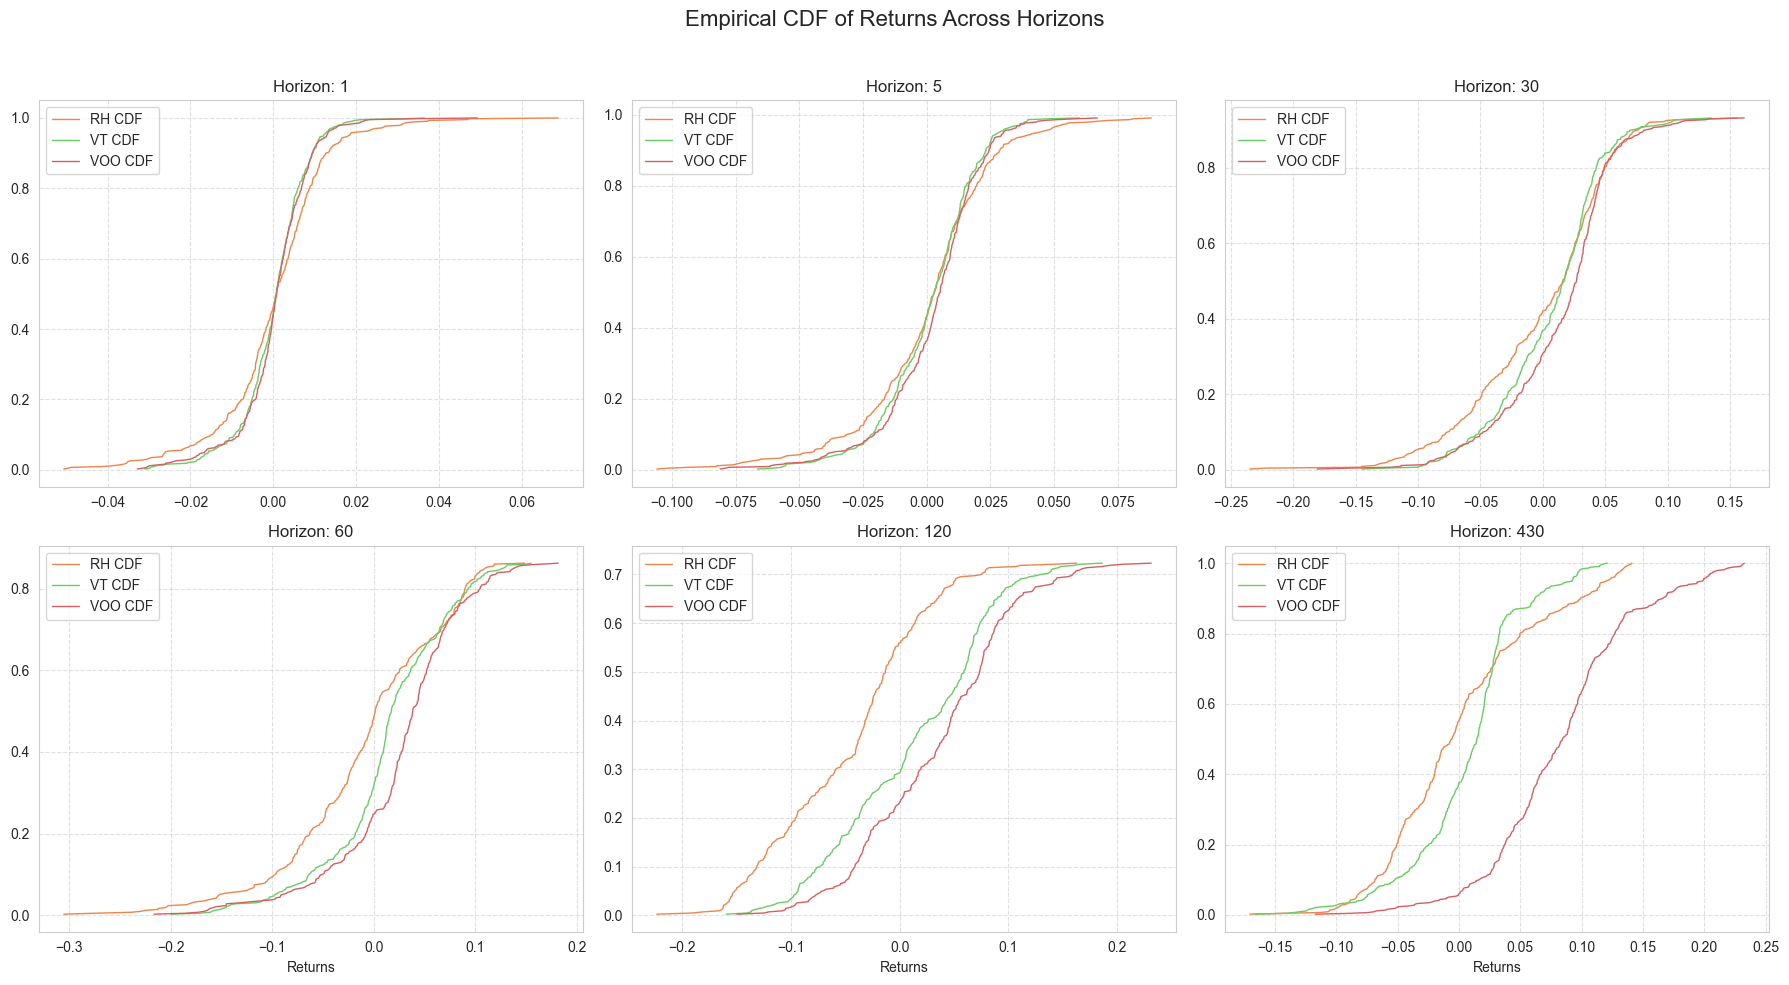

In [3]:
from src import Analyzer

return_params = {"horizons":[1, 5, 30, 60, 120], "start_date":None, "end_date":"2020-02-03", "cumulative":True, "append_start":False}
#return_params = {"horizons":[1, 5, 30, 60, 120], "start_date":"2019-01-01", "end_date":"2020-01-01", "cumulative":True, "append_start":False}
an = Analyzer(compare_tickers=["VT", "VOO"], return_params=return_params)
an.plot_returns_timeseries()
an.plot_returns_cdfs()

In [4]:
returns = an.build_returns()[0]
cols_to_keep = [col for col in returns.columns if col.endswith("return")]
returns = returns[cols_to_keep]
desc = returns.describe().T
desc["count"] = desc["count"].astype(int)
desc["positive returns"] = returns.gt(0).sum() / desc["count"]
#desc_bef.round(6)
desc

,count,mean,std,min,25%,50%,75%,max,positive returns
rh_portfolio_1_return,430,0.000115,0.013490,-0.050597,-0.005461,0.000809,0.007377,0.068808,0.537209
VT_1_return,430,0.000198,0.008361,-0.031068,-0.003794,0.000716,0.004853,0.036545,0.546512
VOO_1_return,430,0.000485,0.008928,-0.032828,-0.003066,0.000757,0.005096,0.049350,0.558140
rh_portfolio_5_return,426,0.000259,0.026549,-0.105948,-0.013623,0.002922,0.014899,0.088194,0.570423
VT_5_return,426,0.001031,0.018612,-0.066412,-0.010824,0.002804,0.013208,0.060003,0.565728
VOO_5_return,426,0.002442,0.019790,-0.081061,-0.008308,0.004981,0.014449,0.067072,0.636150
rh_portfolio_30_return,401,-0.002412,0.055168,-0.234788,-0.041433,0.009412,0.038000,0.155356,0.548628
VT_30_return,401,0.005749,0.042546,-0.144917,-0.020502,0.013801,0.032794,0.134874,0.605985
VOO_30_return,401,0.013029,0.045214,-0.180910,-0.011703,0.023326,0.041188,0.161477,0.670823
rh_portfolio_60_return,371,-0.012211,0.076243,-0.305460,-0.057025,-0.006506,0.042028,0.148547,0.436658


In [5]:
levels = an.build_levels()
levels

,rh_portfolio,VT,VOO
date,,,
2018-05-02,96.041674,73.62,241.78000
2018-05-03,95.826112,73.59,241.21001
2018-05-04,97.179437,74.22,244.41000
2018-05-07,97.955565,74.33,245.17000
2018-05-08,97.534681,74.34,245.16000
...,...,...,...
2020-08-07,138.001671,80.69,307.35999
2020-08-10,138.034713,80.91,308.34000
2020-08-11,135.827047,80.66,305.85001


<Axes: xlabel='date'>

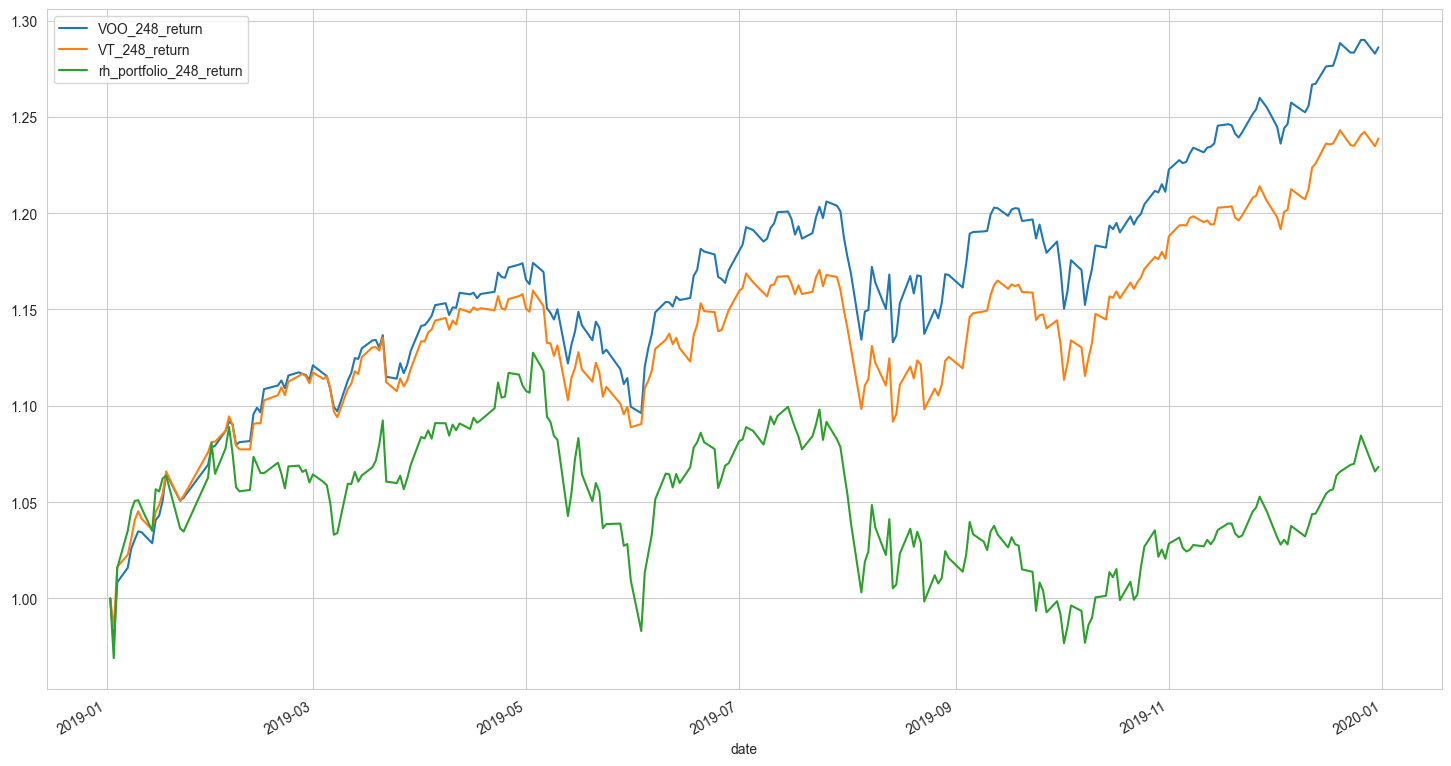

In [33]:
import numpy as np
exp = np.exp(returns)
exp[["VOO_248_return", "VT_248_return", "rh_portfolio_248_return"]].plot(kind="line", figsize=(18,10))

A possible issue is that Fedyk builds using only us stocks, explore difference in market contribution as $w_i\cdot R_t$

In [11]:
from src import DataLoader

dl = DataLoader()

df_merged = dl.merge_dfs()
df_merged= df_merged[(df_merged["date"]>"2019-01-01")*(df_merged["date"]<"2020-01-01")]


df_merged= df_merged[(df_merged["shrcd"]==11)]
df_merged["popularity"] = df_merged["holders"] / df_merged[["date", "holders"]].groupby("date")["holders"].transform("sum")

df_merged["rh_portfolio"] = df_merged["popularity"] * df_merged["prc_adj"]
df_merged = df_merged[["date", "rh_portfolio"]].groupby("date").sum()


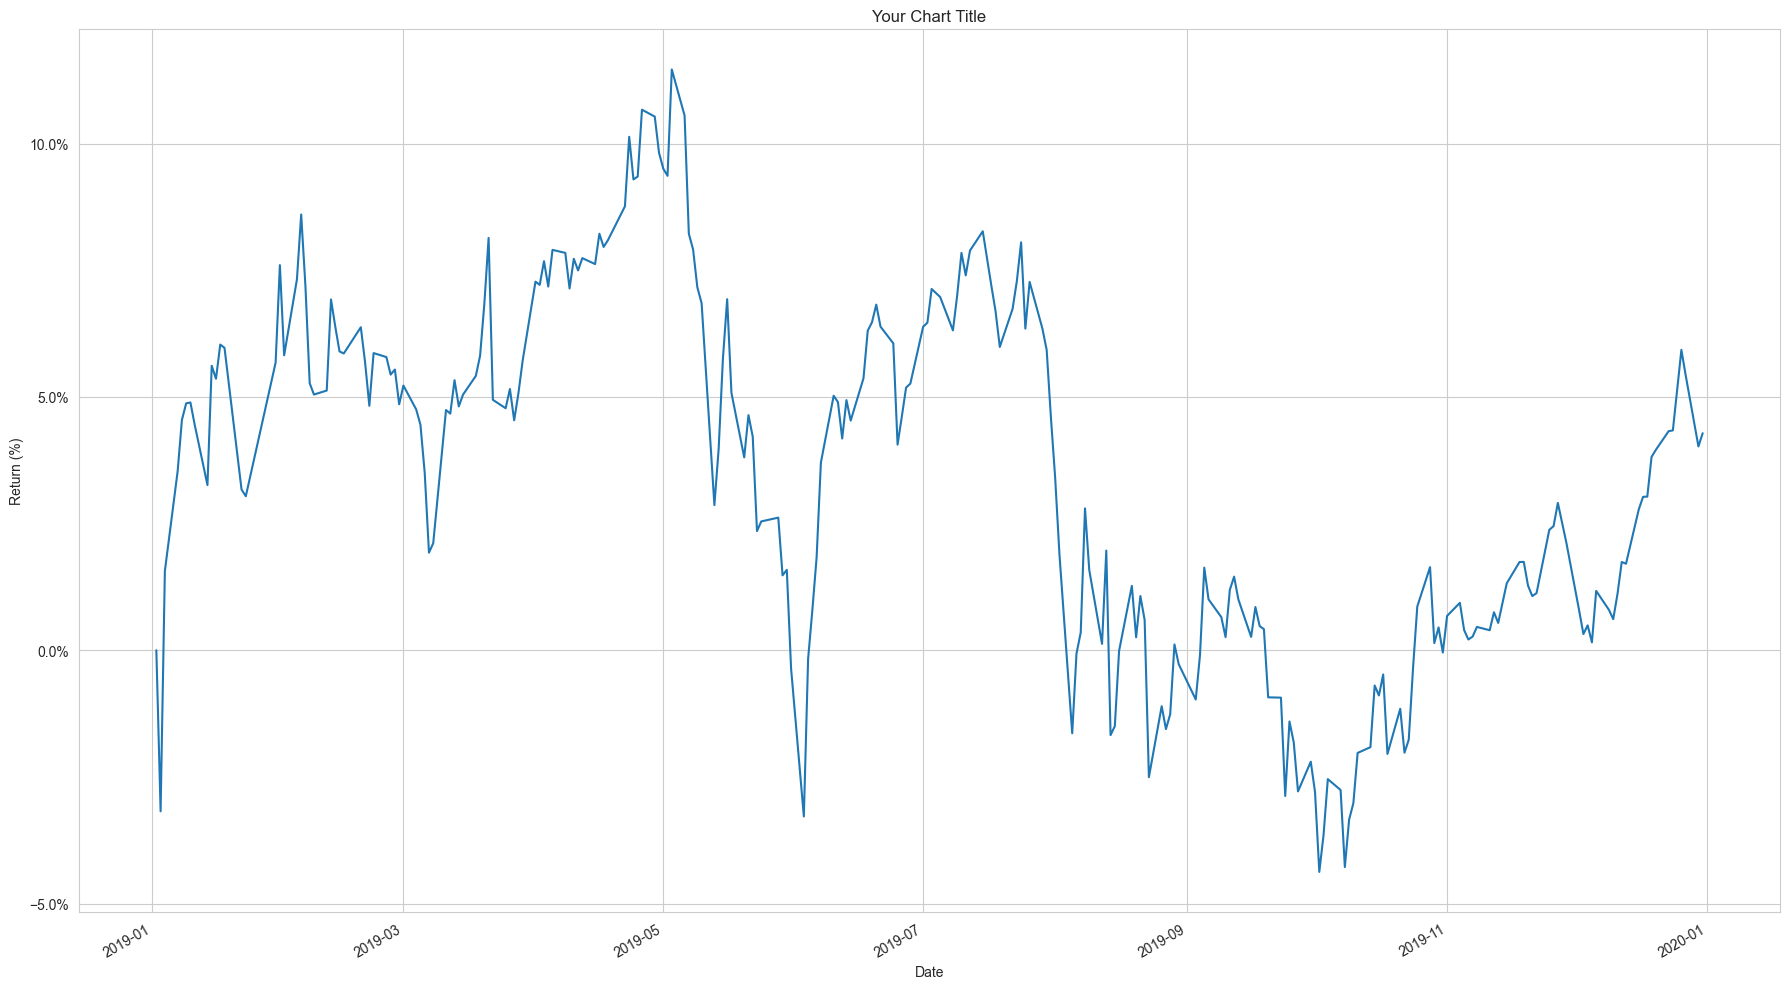

In [12]:
df_keep_plot = df_merged / df_merged.iloc[0] -1
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = df_keep_plot["rh_portfolio"].plot(kind="line", figsize=(18, 10))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # Assumes your values are in decimal (e.g., 0.05 for 5%)

plt.title("Your Chart Title")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


,rh_portfolio_x,rh_portfolio_y
ticker,,
A,4.167768,4.350377
AAL,36.923665,39.017893
AAME,0.020653,0.021473
AAN,0.691180,0.724711
AAOI,3.024248,3.116142
...,...,...
ZTR,0.249780,0.000000
ZTS,7.265466,7.609183
ZUMZ,0.486093,0.506437


- qq Plot

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


# List of columns you want to plot
columns_to_plot = [col for col in returns.columns if col.startswith("rh")]  # Replace with your actual column names

# Set the number of rows and columns for subplots
n_cols = 2
n_cols = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_cols, n_cols, figsize=(5 * n_cols, 12))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate Q-Q plots
for i, column in enumerate(columns_to_plot):
    data = returns[column].dropna()
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {column}")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


NameError: name 'returns' is not defined

- Finding whether the means are statistically different

In [9]:
from scipy import stats

group1 = returns["rh_portfolio_430_return"].dropna()
group2 = returns["VOO_430_return"].dropna()


# Perform the t-test without assuming equal variances (Welch's t-test)
t_statistic_welch, p_value_welch = stats.ttest_ind(group1, group2, equal_var=False)

print(f"Welch's T-statistic: {t_statistic_welch}")
print(f"Welch's P-value: {p_value_welch}")


Welch's T-statistic: -20.159720383162487
Welch's P-value: 2.7952876327493916e-74


- Here i try to show the distribution for a window over time, to see how it progresses.

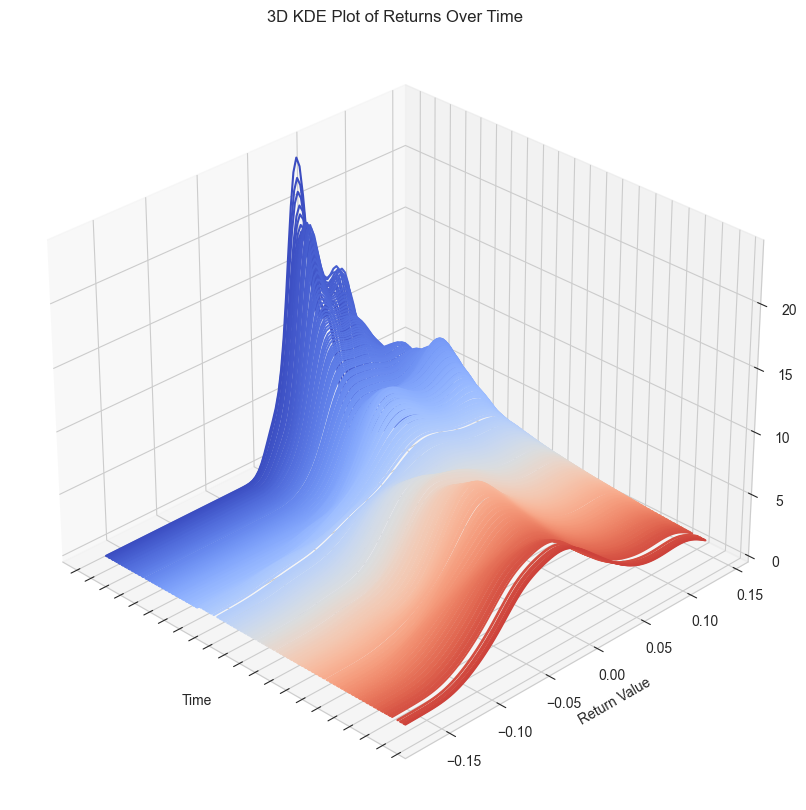

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


ret = an.build_returns()[0]["rh_portfolio_430_return"]

# Apply Seaborn styling
sns.set_style("whitegrid")

# Create a 3D figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Choose the color palette
colors = sns.color_palette("coolwarm", n_colors=len(ret))

overall_min_return = ret.min()
overall_max_return = ret.max()
y_kde = np.linspace(overall_min_return, overall_max_return, 100)

# Iterate through each day and calculate the KDE
for i, d in enumerate(range(30, len(ret.index))):
    # Filter the series up to date d
    internal_ret = ret.head(d)

    # Calculate the KDE
    data_rolling = internal_ret.dropna()  # Handle potential NaNs
    kde = gaussian_kde(data_rolling)


    # Evaluate the KDE on the range of return values
    z_kde = kde(y_kde)

    # Get the time point for this KDE
    time_val_ordinal = internal_ret.index[-1].toordinal()

    # Create the 3D plot, swapping x and y
    ax.plot(np.repeat(time_val_ordinal, len(y_kde)), y_kde, z_kde, label=internal_ret.index[-1].strftime('%Y-%m'), color=colors[i], linewidth=1.5)

# Set labels
ax.set_xlabel("Time")
ax.set_ylabel("Return Value")
ax.set_zlabel("Density")
ax.set_title("3D KDE Plot of Returns Over Time")

# We need to explicitly set the x-axis ticks to be the ordinal values
# corresponding to your actual dates.
ordinal_dates = ret.index.map(pd.Timestamp.toordinal)
ax.set_xticks(ordinal_dates[::50])
ax.set_xticklabels([date.strftime('%Y-%m') for date in ret.index][::50])
ax.xaxis.set_major_locator(mdates.MonthLocator())   
#fig.autofmt_xdate()

# Add legend (optional, might get crowded)
# ax.legend()

# Rotate the view for better visualization
#ax.view_init(elev=0, azim=270)
ax.view_init(azim=-45)

# Show the plot
plt.show()

## Stochastic Dominance

### SSD

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Looking at Different Timeframes

- Here I'm trying to understand from what point onwards the market becomes SSD

In [15]:
from src import Analyzer

an = Analyzer(compare_tickers=["VOO", "VT"])
an.return_params = {"horizons":[1, 5, 30, 60, 120], "start_date":None, "end_date":"2020-02-03", "cumulative":True, "append_start":False}


2025-04-06 23:14:44,463 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


In [16]:

ret = an.build_returns()[0]
ret.describe()

,rh_portfolio,VOO,VT,rh_portfolio_1_return,VOO_1_return,VT_1_return,rh_portfolio_5_return,VOO_5_return,VT_5_return,rh_portfolio_30_return,...,VT_30_return,rh_portfolio_60_return,VOO_60_return,VT_60_return,rh_portfolio_120_return,VOO_120_return,VT_120_return,rh_portfolio_430_return,VOO_430_return,VT_430_return
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,426.000000,426.000000,426.000000,401.000000,...,401.000000,371.000000,371.000000,371.000000,311.000000,311.000000,311.000000,430.000000,430.000000,430.000000
mean,0.000115,0.000485,0.000198,0.000115,0.000485,0.000198,0.000259,0.002442,0.001031,-0.002412,...,0.005749,-0.012211,0.023144,0.010207,-0.048091,0.032986,0.010458,0.001810,0.084082,0.007368
std,0.013490,0.008928,0.008361,0.013490,0.008928,0.008361,0.026549,0.019790,0.018612,0.055168,...,0.042546,0.076243,0.062119,0.059781,0.066510,0.066707,0.068833,0.060701,0.058964,0.045975
min,-0.050597,-0.032828,-0.031068,-0.050597,-0.032828,-0.031068,-0.105948,-0.081061,-0.066412,-0.234788,...,-0.144917,-0.305460,-0.216585,-0.199737,-0.223381,-0.149697,-0.159522,-0.170420,-0.117065,-0.166474
25%,-0.005461,-0.003066,-0.003794,-0.005461,-0.003066,-0.003794,-0.013623,-0.008308,-0.010824,-0.041433,...,-0.020502,-0.057025,-0.005072,-0.014988,-0.100718,-0.023424,-0.043950,-0.045256,0.044986,-0.013745
50%,0.000809,0.000757,0.000716,0.000809,0.000757,0.000716,0.002922,0.004981,0.002804,0.009412,...,0.013801,-0.006506,0.030436,0.011650,-0.037019,0.040461,0.013403,-0.005744,0.084392,0.014630
75%,0.007377,0.005096,0.004853,0.007377,0.005096,0.004853,0.014899,0.014449,0.013208,0.038000,...,0.032794,0.042028,0.060102,0.047872,-0.005501,0.077808,0.064461,0.033562,0.118022,0.029676
max,0.068808,0.049350,0.036545,0.068808,0.049350,0.036545,0.088194,0.067072,0.060003,0.155356,...,0.134874,0.148547,0.181531,0.154998,0.162873,0.231377,0.186378,0.140801,0.232480,0.120887


In [17]:
cols_to_keep = [col for col in ret.columns if ("rh_portfolio_" in col or "VOO_" in col)]
voo_rh = ret[cols_to_keep]
voo_rh 

,rh_portfolio_1_return,VOO_1_return,rh_portfolio_5_return,VOO_5_return,rh_portfolio_30_return,VOO_30_return,rh_portfolio_60_return,VOO_60_return,rh_portfolio_120_return,VOO_120_return,rh_portfolio_430_return,VOO_430_return
date,,,,,,,,,,,,
2018-05-02,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2018-05-03,-0.002247,-0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002247,-0.002360
2018-05-04,0.014024,0.013179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011777,0.010819
2018-05-07,0.007955,0.003105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019732,0.013924
2018-05-08,-0.004306,-0.000041,0.015426,0.013883,NaN,NaN,NaN,NaN,NaN,NaN,0.015426,0.013883
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,0.013363,0.010775,-0.014694,-0.013160,0.071454,0.055287,0.090415,0.086331,0.011342,0.079893,0.016805,0.217253
2020-01-29,0.004138,-0.000999,-0.011428,-0.014422,0.073192,0.047906,0.103856,0.088858,0.023800,0.080698,0.020943,0.216254
2020-01-30,0.008871,0.003127,-0.006581,-0.012279,0.084372,0.049182,0.110006,0.089039,0.036433,0.086248,0.029813,0.219381


In [18]:
from tqdm import tqdm
import pandas as pd

df_ssd = pd.DataFrame()
df_ssd.index = voo_rh.index


for h in [1, 5, 30, 60, 120, 430]:
    # Find the columns of returns for that speficic horizon
    h_cols = [col for col in voo_rh if f"_{h}_" in col]
    # Filter the dataframe
    h_df = voo_rh[h_cols]
    h_df = h_df.dropna() # Avoids empty arrays

    out_single_h = {}
    for day in tqdm(range(2, len(h_df)+1)): # Doesnt make sense to compare when you have just 1 point
        # Take the first #day 
        one_day = h_df.head(day)
        # Perform test and store percentage of points
        pct = an.test_second_order_stochastic_dominance(col_a=f"VOO_{h}_return", col_b=f"rh_portfolio_{h}_return", df=one_day)[4]
        out_single_h[one_day.index[-1]] = pct

    # Rename to have a column with that name and merge on index (date)
    out_single_h_series = pd.Series(out_single_h, name=f"SSD_{h}")
    df_ssd = df_ssd.merge(out_single_h_series, how="left", left_index=True, right_index=True)


100%|██████████| 429/429 [00:00<00:00, 2335.76it/s]


<Axes: xlabel='date'>

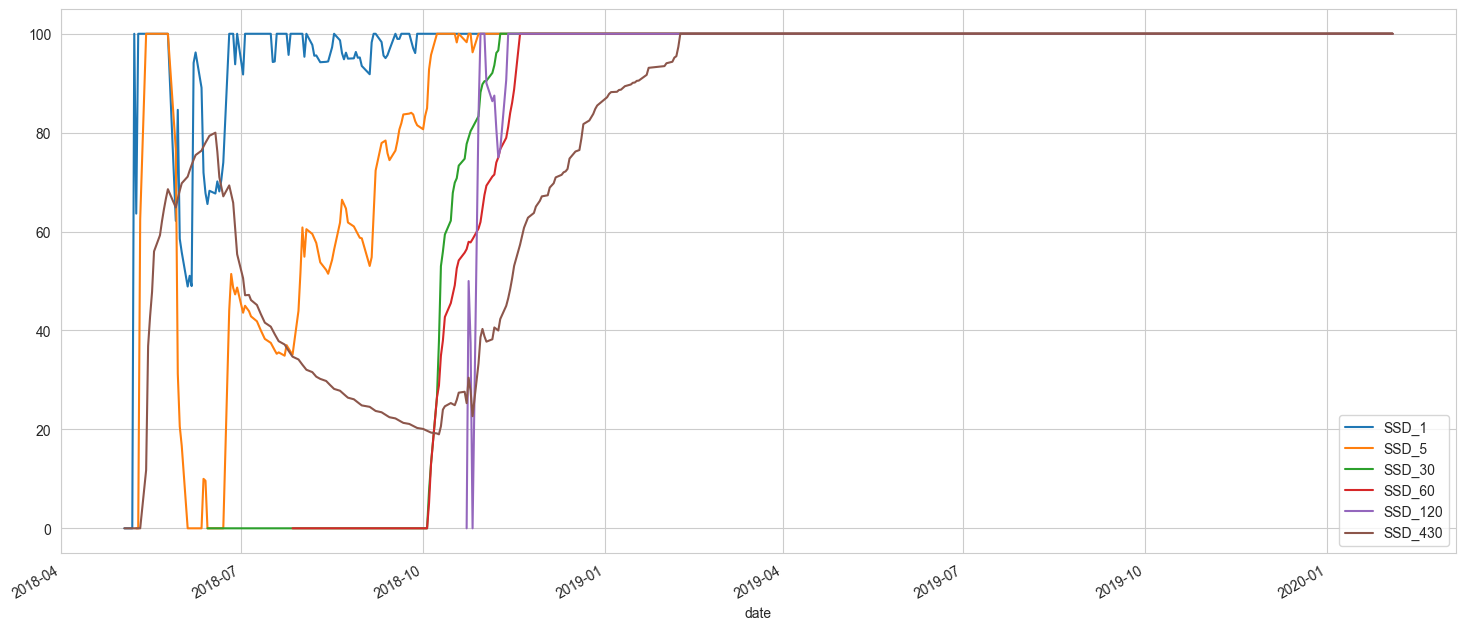

In [19]:
df_ssd.plot(kind="line", figsize=(18, 8))

- Here I plot SSD test at the last day of the dataset 

2025-04-06 23:15:18,370 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


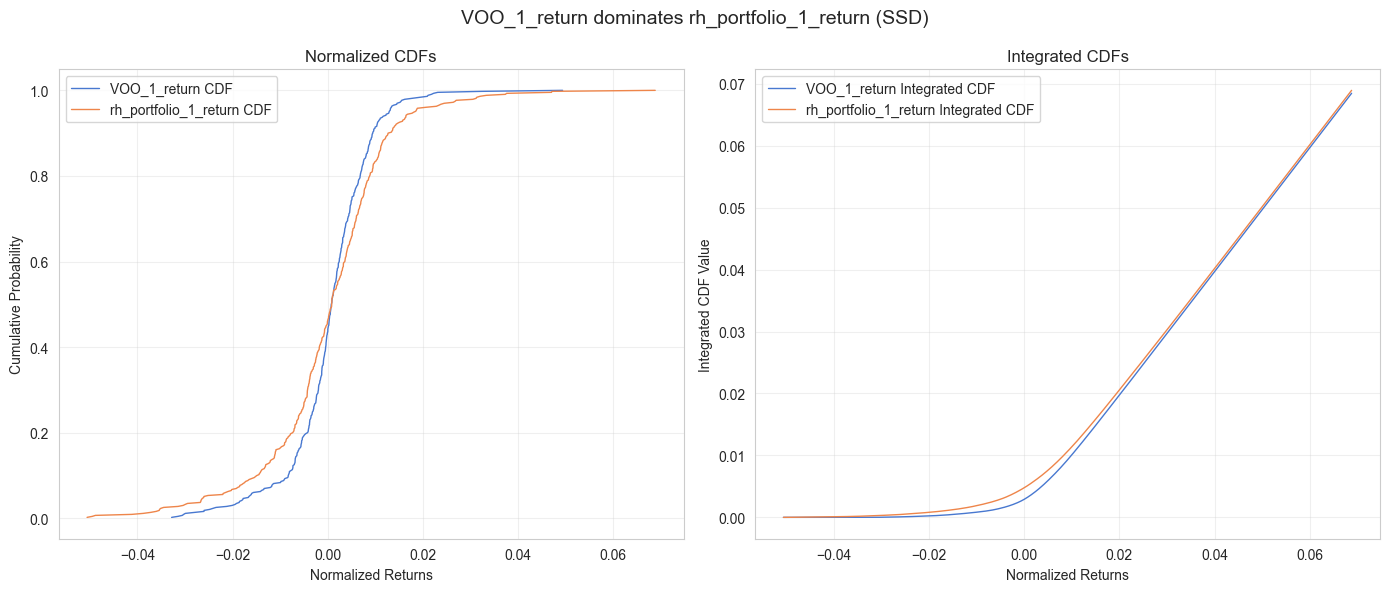

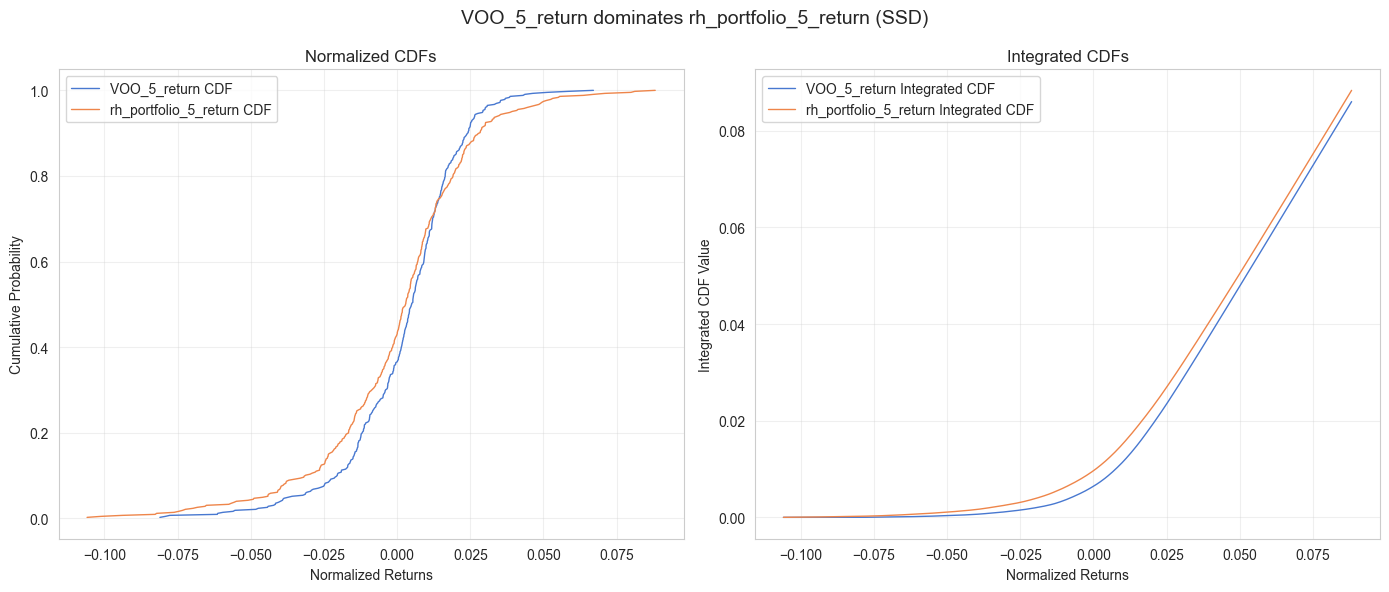

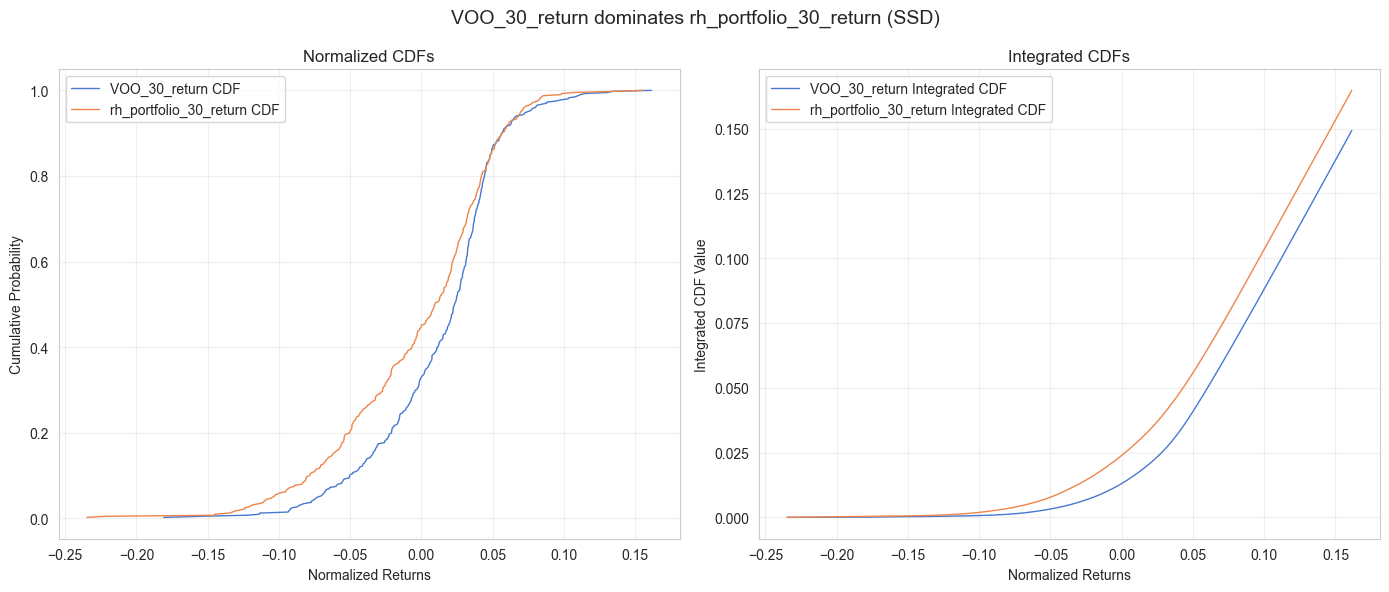

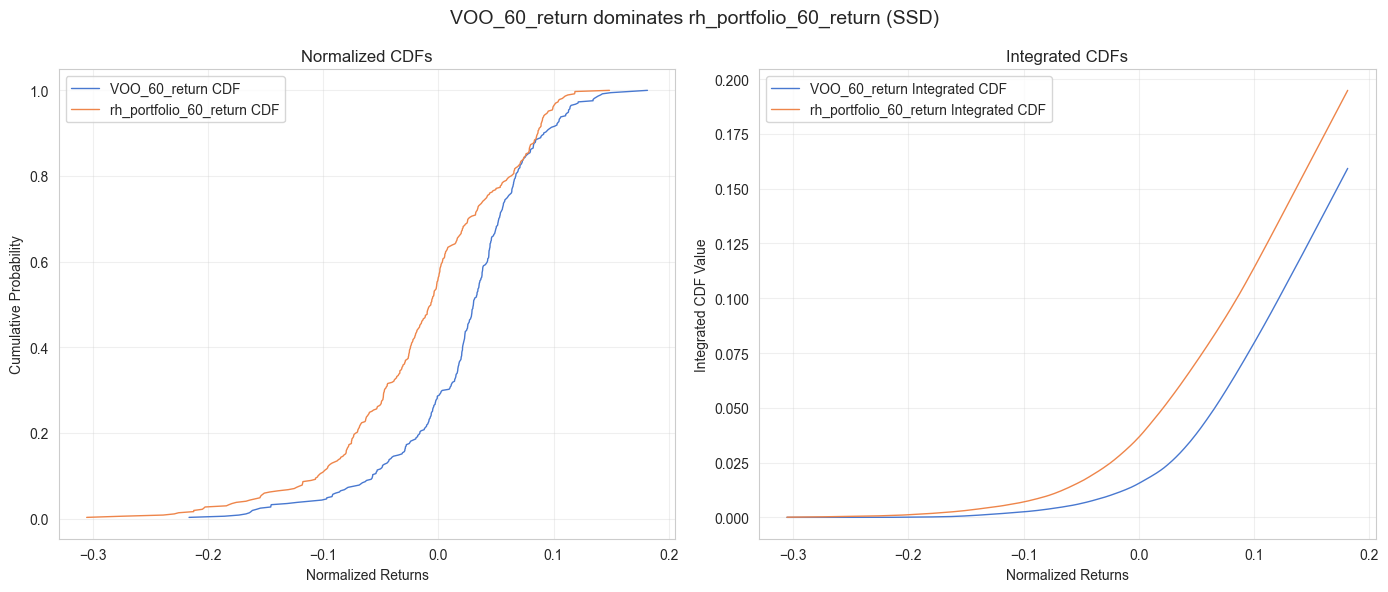

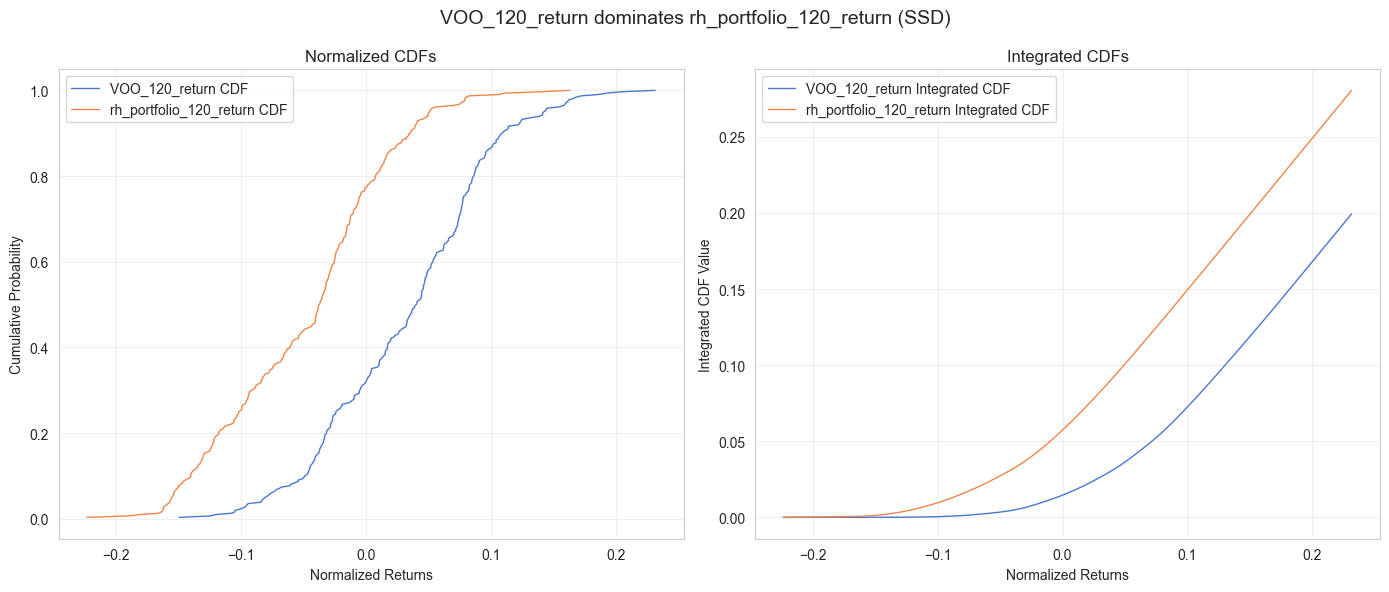

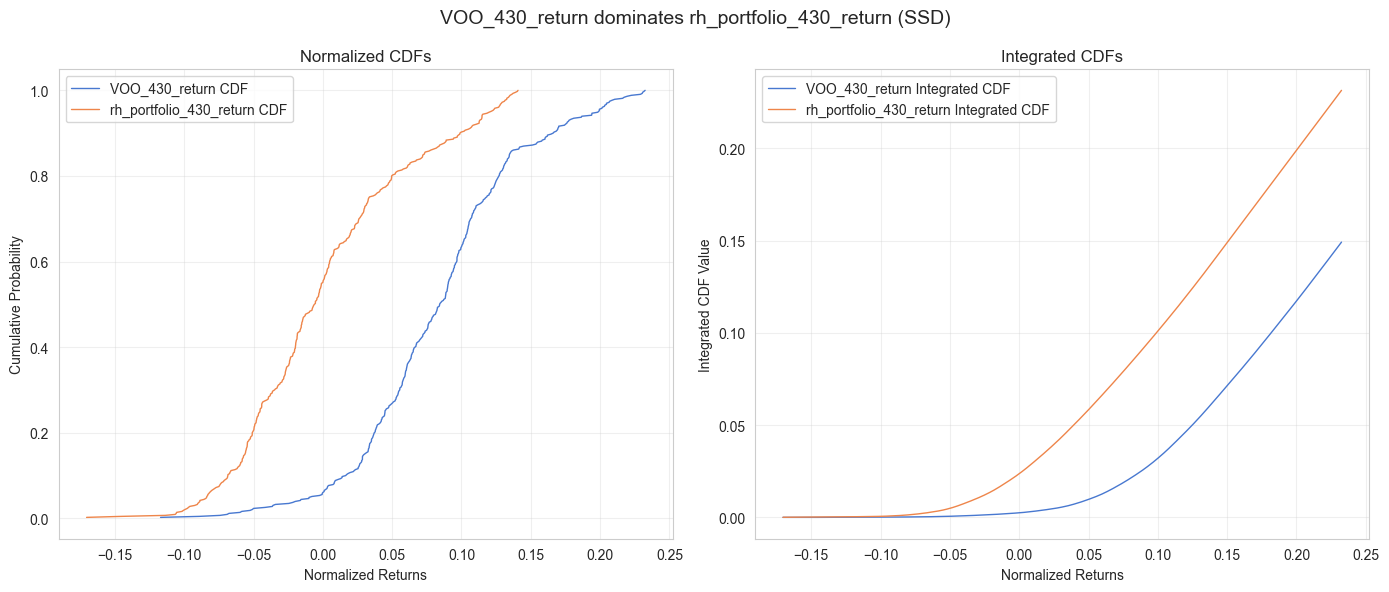

In [21]:
from src import Analyzer

an = Analyzer(return_params=return_params)



for hor in [1, 5, 30, 60, 120, 430]:
    an.plot_ssd_comparison(col_a=f"VOO_{hor}_return", col_b=f"rh_portfolio_{hor}_return")

## Risk Aversion

- here I try to estimate risk aversion for different timeframes using CRRA
\begin{equation}
    U(W) = 
    \begin{cases}
    \frac{W^{1-\gamma}-1}{1-\gamma}, \gamma\neq 1\\
    \ln(W), \gamma = 1
    \end{cases}
\end{equation}

**Main Problem**: How should i compute the variance?

In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
from src import Analyzer
import pandas as pd

an = Analyzer()
an.return_params = {"horizons":[1, 5, 30, 60, 120], "end_date":None, "cumulative":True, "append_start":False}

voo_rh = an.build_returns()[0]
voo_rh

2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


,rh_portfolio,VOO,rh_portfolio_1_return,VOO_1_return,rh_portfolio_5_return,VOO_5_return,rh_portfolio_30_return,VOO_30_return,rh_portfolio_60_return,VOO_60_return,rh_portfolio_120_return,VOO_120_return,rh_portfolio_564_return,VOO_564_return
date,,,,,,,,,,,,,,
2018-05-02,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2018-05-03,-0.002247,-0.002360,-0.002247,-0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002247,-0.002360
2018-05-04,0.014024,0.013179,0.014024,0.013179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011777,0.010819
2018-05-07,0.007955,0.003105,0.007955,0.003105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019732,0.013924
2018-05-08,-0.004306,-0.000041,-0.004306,-0.000041,0.015426,0.013883,NaN,NaN,NaN,NaN,NaN,NaN,0.015426,0.013883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,-0.013430,0.000521,-0.013430,0.000521,0.042994,0.023904,0.355362,0.079891,0.641470,0.172196,0.266849,-0.006712,0.362484,0.239991
2020-08-10,0.000239,0.003183,0.000239,0.003183,0.022503,0.020809,0.381376,0.106789,0.625174,0.163393,0.253757,-0.008333,0.362723,0.243175
2020-08-11,-0.016123,-0.008108,-0.016123,-0.008108,-0.007306,0.008504,0.344959,0.089377,0.595460,0.150789,0.247178,-0.012509,0.346600,0.235067


In [3]:
def compute_crra_gamma(mean:float, risk_free:float, var:float):
    """
    Given the inputs it estimates the gamma of a CRRA utility function.

    Returns:
    - gamma : float
    """

    gamma = (mean - risk_free)/var + 1/2
    return gamma

rh_portfolio    1.129293
VOO             6.583666
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.451961
VOO             2.264908
Name: 2020-08-12 00:00:00, dtype: object


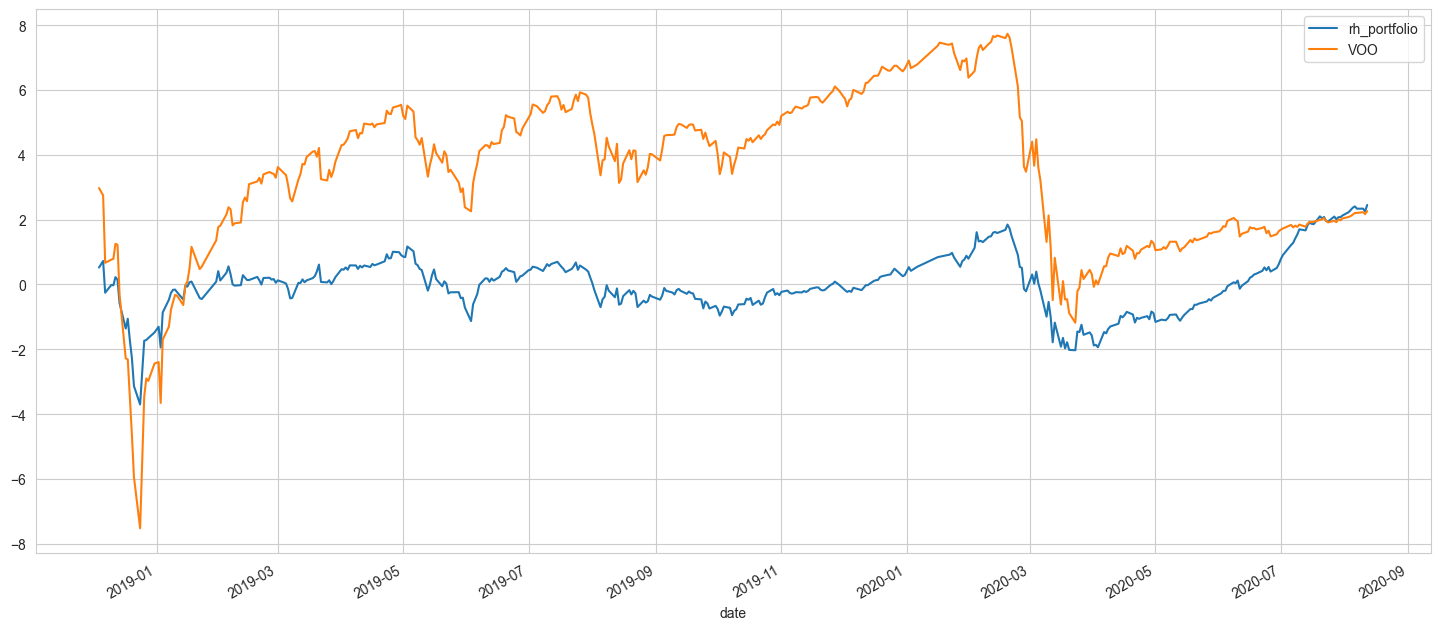

In [70]:

# Assuming voo_rh is your DataFrame
df_gamma = pd.DataFrame(index=voo_rh.index)
df_gamma["rh_portfolio"] = None
df_gamma["VOO"] = None

days = 1

#voo_rh = voo_rh / voo_rh.shift(days)
#voo_rh = voo_rh.dropna()
#print(voo_rh)

# Iterate over the range and compute gamma for each window
for d in range(150, len(voo_rh)):
    window = voo_rh.head(d)

    # Compute CRRA gamma for 'rh_portfolio_5_return' and 'VOO_5_return'
    gamma_rh = compute_crra_gamma(window[f"rh_portfolio_{days}_return"].mean(), 0, window[f"rh_portfolio_{days}_return"].var())
    gamma_voo = compute_crra_gamma(window[f"VOO_{days}_return"].mean(), 0, window[f"VOO_{days}_return"].var())

    #mean_rh = window[f"rh_portfolio_{days}_return"].mean()
    #mean_voo = window[f"VOO_{days}_return"].mean()
    
    # Assign the computed gamma to the corresponding rows
    #df_gamma.loc[window.index[-1], "rh_portfolio"] = mean_rh
    #df_gamma.loc[window.index[-1], "VOO"] = mean_voo
    df_gamma.loc[window.index[-1], "rh_portfolio"] = gamma_rh
    df_gamma.loc[window.index[-1], "VOO"] = gamma_voo

# Check if df_gamma contains values
df_gamma = df_gamma.dropna()

# Optionally, plot the results
df_gamma.plot(kind="line", figsize=(18, 8))

print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

rh_portfolio    0.867785
VOO             6.735428
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.338959
VOO              2.69506
Name: 2020-08-12 00:00:00, dtype: object


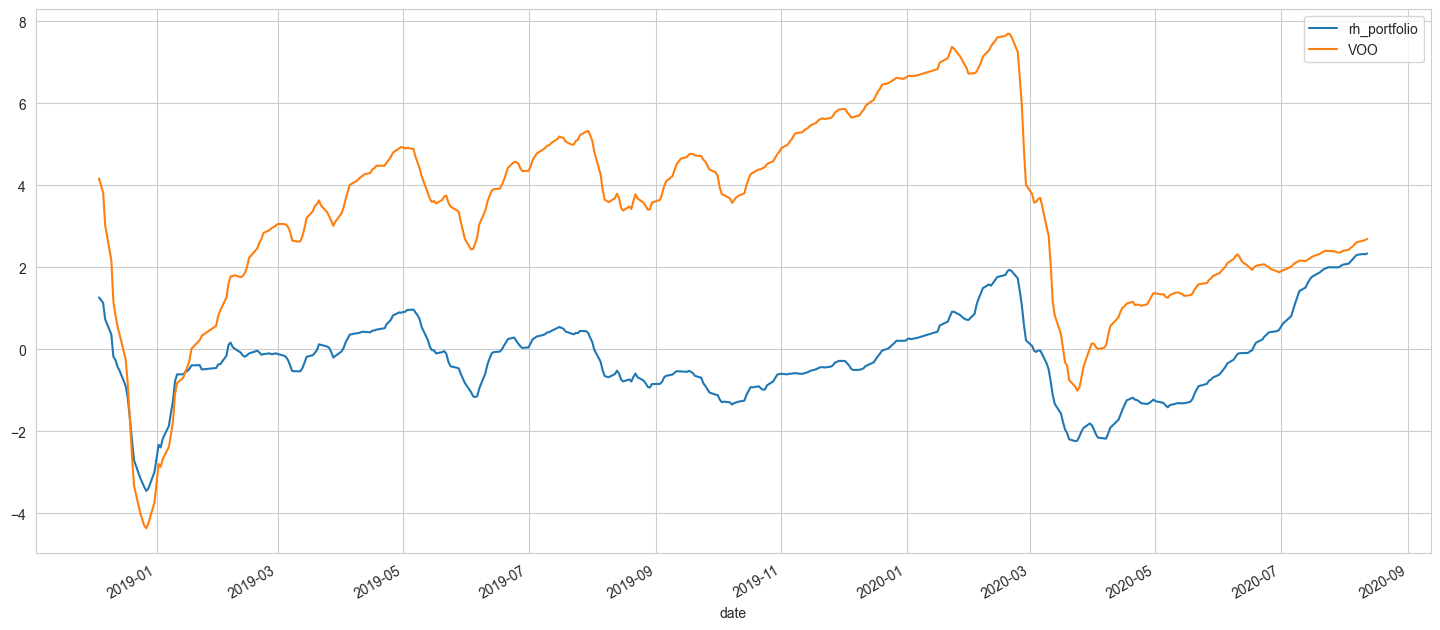

In [71]:

# Assuming voo_rh is your DataFrame
df_gamma = pd.DataFrame(index=voo_rh.index)
df_gamma["rh_portfolio"] = None
df_gamma["VOO"] = None

days = 5

#voo_rh = voo_rh / voo_rh.shift(days)
#voo_rh = voo_rh.dropna()
#print(voo_rh)

# Iterate over the range and compute gamma for each window
for d in range(150, len(voo_rh)):
    window = voo_rh.head(d)

    # Compute CRRA gamma for 'rh_portfolio_5_return' and 'VOO_5_return'
    gamma_rh = compute_crra_gamma(window[f"rh_portfolio_{days}_return"].mean(), 0, window[f"rh_portfolio_{days}_return"].var())
    gamma_voo = compute_crra_gamma(window[f"VOO_{days}_return"].mean(), 0, window[f"VOO_{days}_return"].var())

    #mean_rh = window[f"rh_portfolio_{days}_return"].mean()
    #mean_voo = window[f"VOO_{days}_return"].mean()
    
    # Assign the computed gamma to the corresponding rows
    #df_gamma.loc[window.index[-1], "rh_portfolio"] = mean_rh
    #df_gamma.loc[window.index[-1], "VOO"] = mean_voo
    df_gamma.loc[window.index[-1], "rh_portfolio"] = gamma_rh
    df_gamma.loc[window.index[-1], "VOO"] = gamma_voo

# Check if df_gamma contains values
df_gamma = df_gamma.dropna()

# Optionally, plot the results
df_gamma.plot(kind="line", figsize=(18, 8))

print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

In [5]:
df_gamma.median()

rh_portfolio    0.003085
VOO             3.726202
dtype: object

In [6]:
print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

rh_portfolio    1.129293
VOO             6.583666
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.451961
VOO             2.264908
Name: 2020-08-12 00:00:00, dtype: object


- In this other method i compute the gross returns then i get the utility for them and get the mean, i.e. the expectation.
- This is sensible in the last days of the sample, otherwise it would imply perfect foresight.
    - To adress this i can iterate over each day and get the returns up to that point

### All Possible Windows 

In [81]:
from src import Analyzer
import pandas as pd

an = Analyzer(compare_tickers=["VOO", "VT"])

2025-04-06 23:06:52,663 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 23:06:52,663 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 23:06:52,663 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


In [82]:
#df_merged = an.df_merged[an.df_merged["date"]<="2020-02-03"]
df_merged = an.df_merged

df_merged

,date,prc_adj,popularity,ticker
0,2018-05-02,65.91,0.000113,A
1,2018-05-03,66.34,0.000113,A
2,2018-05-04,67.00,0.000113,A
3,2018-05-07,67.39,0.000113,A
4,2018-05-08,67.37,0.000111,A
...,...,...,...,...
2874703,2020-08-07,4.22,0.000993,ZYNE
2874704,2020-08-10,4.24,0.000988,ZYNE
2874705,2020-08-11,4.07,0.000983,ZYNE
2874706,2020-08-12,3.96,0.000981,ZYNE


In [83]:
levels_rh = an.build_levels()
levels_rh.index = pd.to_datetime(levels_rh.index)
levels_rh

,rh_portfolio,VOO,VT
date,,,
2018-05-02,96.041674,241.78000,73.62
2018-05-03,95.826112,241.21001,73.59
2018-05-04,97.179437,244.41000,74.22
2018-05-07,97.955565,245.17000,74.33
2018-05-08,97.534681,245.16000,74.34
...,...,...,...
2020-08-07,138.001671,307.35999,80.69
2020-08-10,138.034713,308.34000,80.91
2020-08-11,135.827047,305.85001,80.66


In [84]:
# Set doesnt allow to duplicate items
all_windows = set()

# get dates to iterate on
df_merged["date"] = pd.to_datetime(df_merged["date"])
dates = df_merged["date"].unique()


for date1 in dates:
    for date2 in dates:
        # Order the dates so that i dont have problems in computing reteurns and i dont have tuples with the same value in different order 
        if date2>date1:
            inner_tuple = (date1, date2)
            all_windows.add(inner_tuple)


all_windows = list(all_windows)


In [85]:
from tqdm import tqdm
import pandas as pd
import numpy as np

all_ret = []
for window in tqdm(all_windows):

    # get first and last value (days)
    beg = window[0]
    end = window[1]
    
    # Compute days between them

    # compute gross returns
    ret = levels_rh.loc[end]/levels_rh.loc[beg]

    all_ret.append(ret)

# Create DataFrame from the list of Series
all_ret_df = pd.DataFrame(all_ret)

# Assign MultiIndex with start and end dates
all_ret_df.index = pd.MultiIndex.from_tuples(all_windows, names=["start_date", "end_date"])

all_ret_df['date_difference'] = all_ret_df.index.map(lambda x: (x[1] - x[0]).days)



100%|██████████| 158766/158766 [00:18<00:00, 8718.39it/s] 


<Axes: ylabel='Density'>

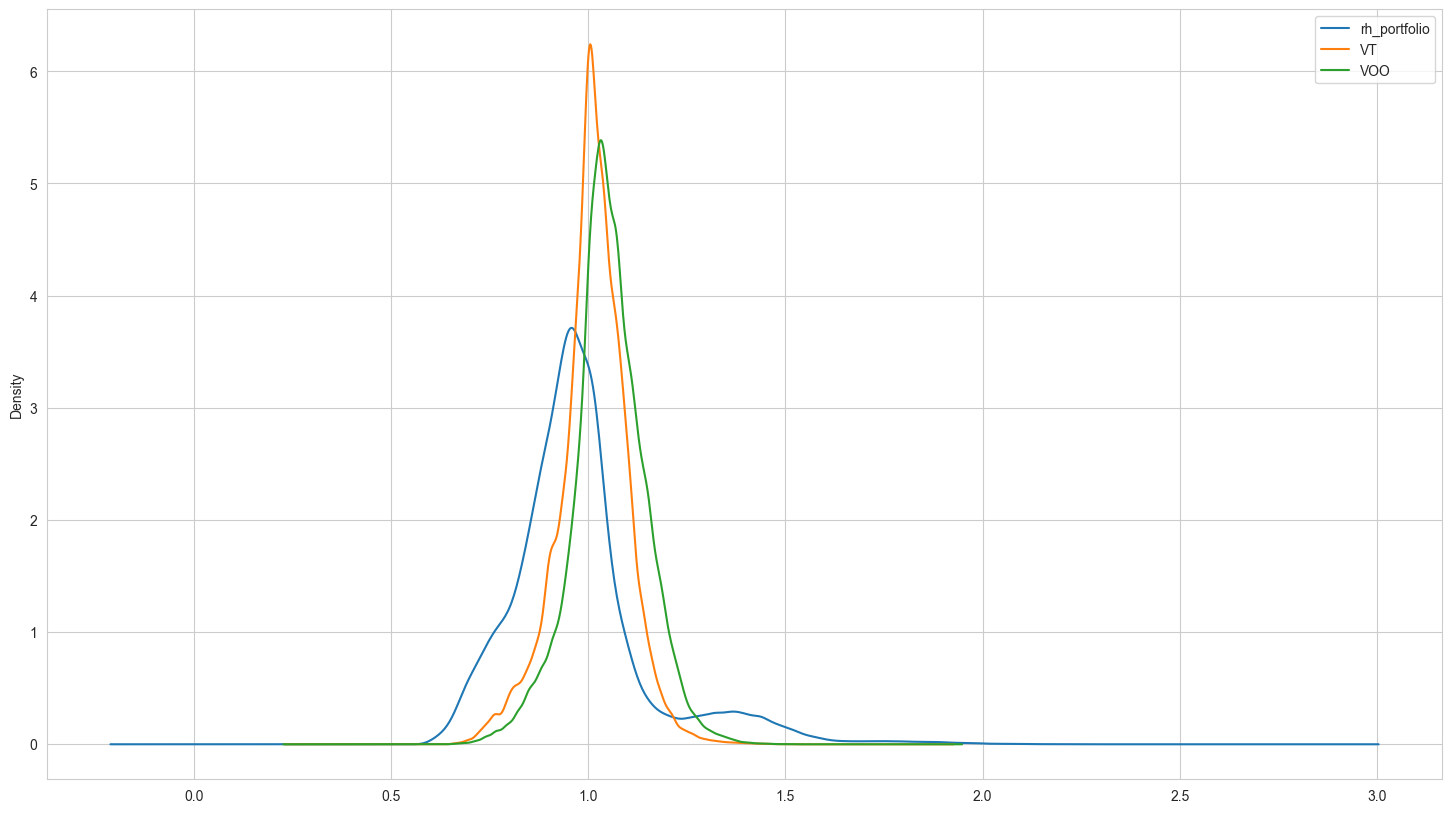

In [87]:
all_ret_df[["rh_portfolio", "VT", "VOO"]].plot(kind="kde", figsize=(18,10))

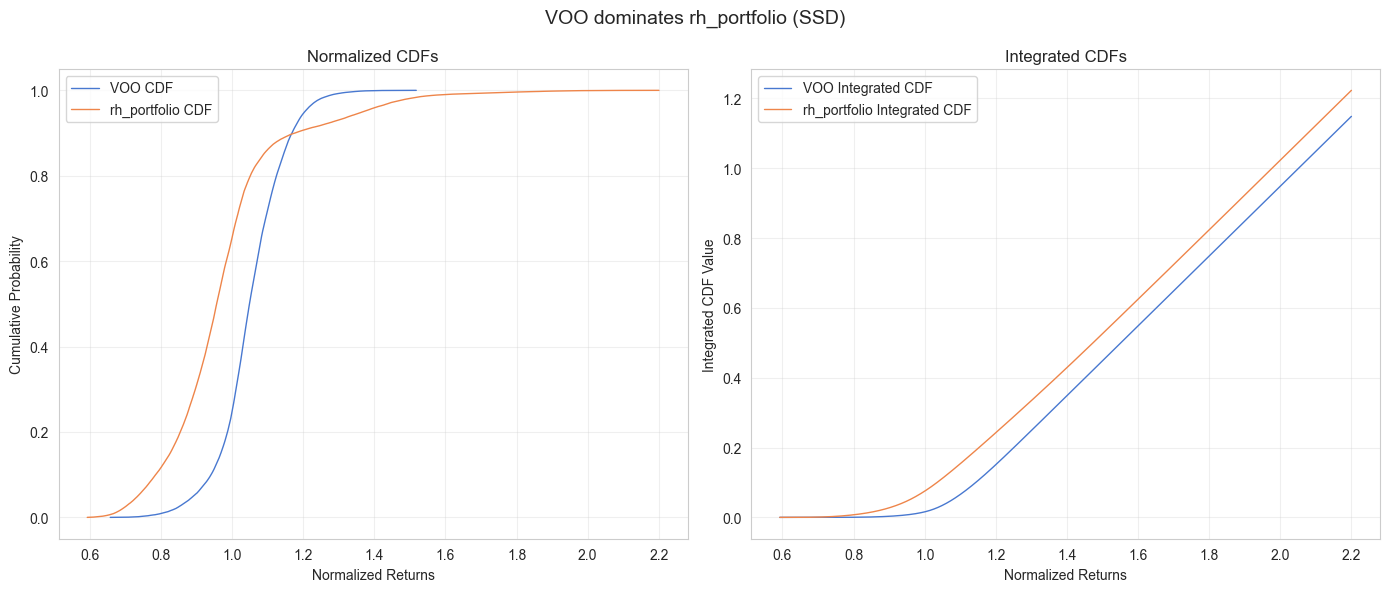

np.True_

In [88]:
an.plot_ssd_comparison("VOO", "rh_portfolio", all_ret_df)

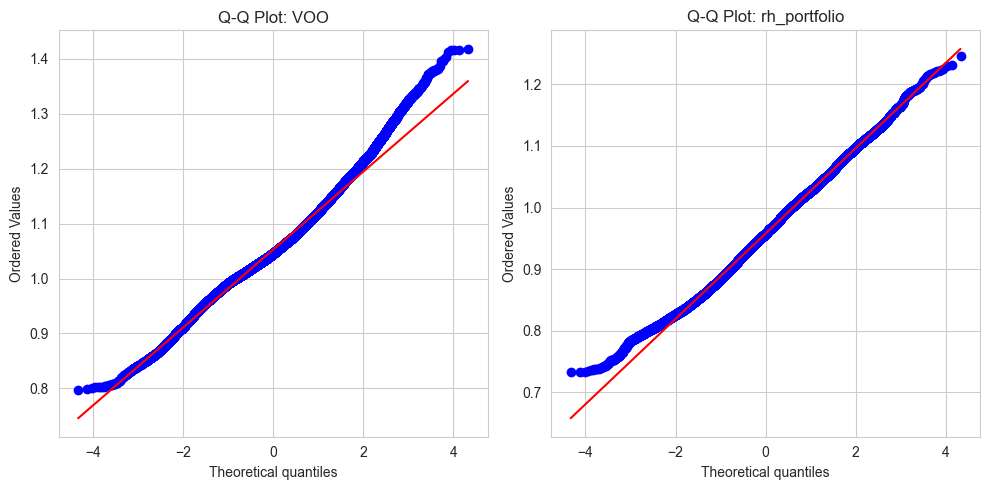

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# List of columns you want to plot
columns_to_plot = ["VOO", "rh_portfolio"]  # Replace with your actual column names

# Set the number of rows and columns for subplots
n_cols = 2
n_cols = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_cols, n_cols, figsize=(10, 5 * n_cols))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate Q-Q plots
for i, column in enumerate(columns_to_plot):
    data = all_ret_df[column].dropna()
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {column}")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
